In [6]:
#EJERCICIO 2: A partir del UN General Debate Dataset, genera los histogramas de frecuencia y
# las nubes de palabras correspondientes a los años 1970, 1980, 1990, 2000 y 2010.
#Análisis de frecuencia de palabras
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter


In [7]:
file = "un-general-debates-blueprint.csv"

df = pd.read_csv("./sample_data/"+file)
df.sample(2)

,session,year,country,country_name,speaker,position,text
3925,52,1997,ARE,United Arab Emirates,Rashid Abdullah Al-Noaimi,Minister for Foreign Affairs,﻿It gives me pleasure to extend to the\nPresid...
6585,66,2011,DNK,Denmark,Carsten Staur,UN Representative,"First of all, I would like to \nalign myself w..."


In [8]:
import regex as re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
#Procesamiento


stopwords = set(nltk.corpus.stopwords.words('english'))

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*',text)

def remove_stopword(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

pipeline = [str.lower, tokenize, remove_stopword]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [10]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)
print("Tokens procesados exitosamente")

Tokens procesados exitosamente


In [11]:
#Contador de palabras con Counter
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

In [12]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

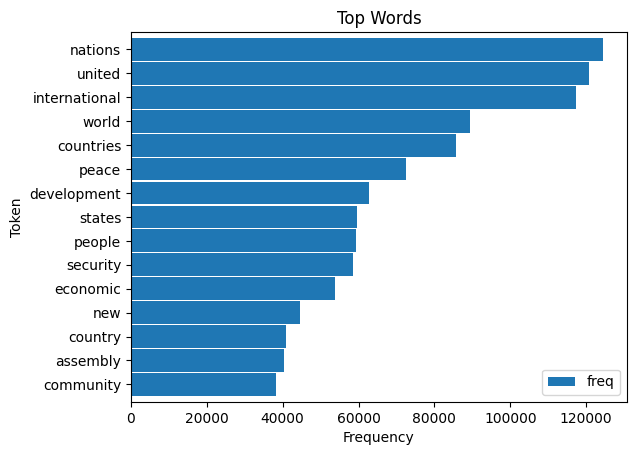

In [13]:
#Representación visual de la frecuencia de palabras
ax = freq_df.head(15).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [14]:
#Nube de palabras (wordcloud)
from wordcloud import WordCloud

def wordcloud_plot(word_freq, title=None, max_words=200, stopwords=None):
    wc = WordCloud(width=800, height=400,
                   background_color='black', colormap='Paired',
                   max_font_size=150, max_words=max_words)

    # convert DataFrame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() if token not in stopwords}

    wc.generate_from_frequencies(counter)
    plt.figure(figsize=(12, 6))
    plt.title(title, fontsize=16)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()


In [15]:
#Ejercicio: A partir del UN General Debate Dataset, genera los histogramas de frecuencia y las nubes de palabras correspondientes a los años 1970, 1980, 1990, 2000 y 2010.
#Consideraciones: • Elimina las palabras de alta frecuencia (stopwords) para obtener resultados más representativos.
# Años a analizar
years = [1970, 1980, 1990, 2000, 2010]

# Diccionario para almacenar los DataFrames de frecuencia
freq_by_year = {}

# Calcular frecuencias para cada año
for year in years:
    df_year = df[df['year'] == year]
    freq_by_year[year] = count_words(df_year)
    print(f"Año {year}: {len(df_year)} documentos procesados")

Año 1970: 70 documentos procesados
Año 1980: 149 documentos procesados
Año 1990: 156 documentos procesados
Año 2000: 178 documentos procesados
Año 2010: 189 documentos procesados


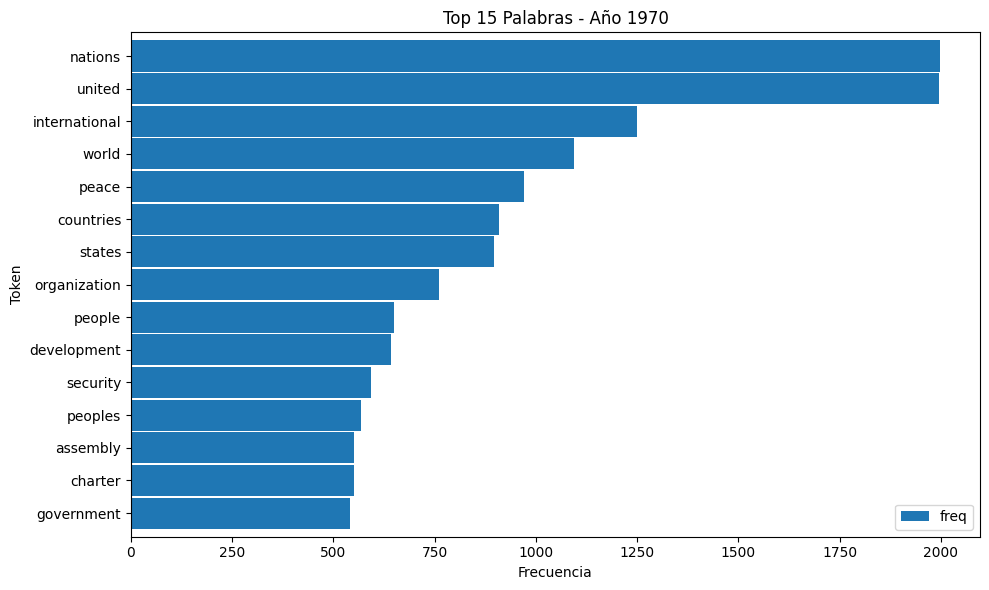

In [16]:
#Histograma de frecuencias
# 1970
fig, ax = plt.subplots(figsize=(10, 6))
freq_by_year[1970].head(15).plot(kind='barh', width=0.95, ax=ax)
ax.invert_yaxis()
ax.set(xlabel='Frecuencia', ylabel='Token', title='Top 15 Palabras - Año 1970')
plt.tight_layout()
plt.show()

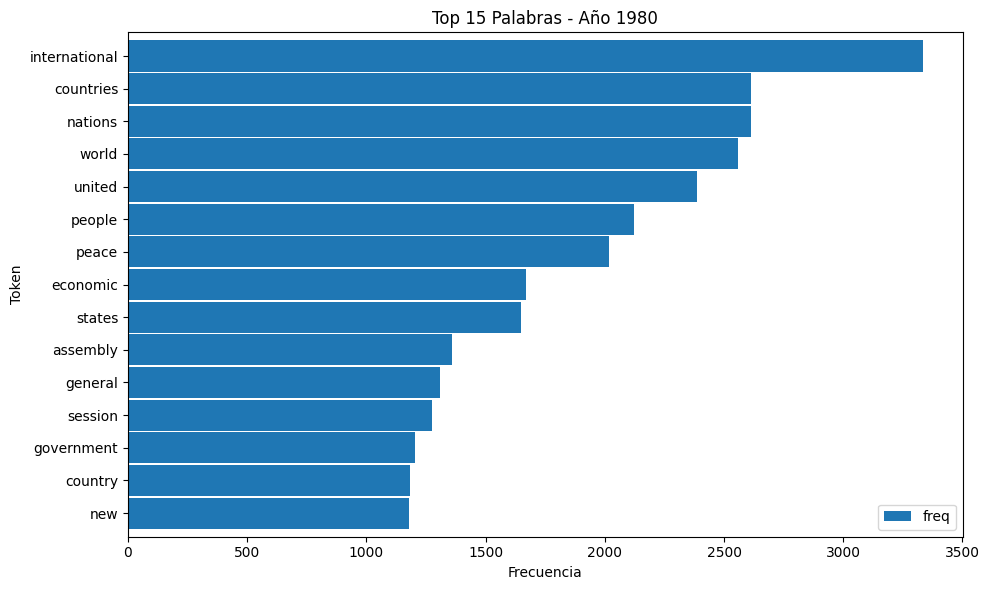

In [17]:
# 1980
fig, ax = plt.subplots(figsize=(10, 6))
freq_by_year[1980].head(15).plot(kind='barh', width=0.95, ax=ax)
ax.invert_yaxis()
ax.set(xlabel='Frecuencia', ylabel='Token', title='Top 15 Palabras - Año 1980')
plt.tight_layout()
plt.show()

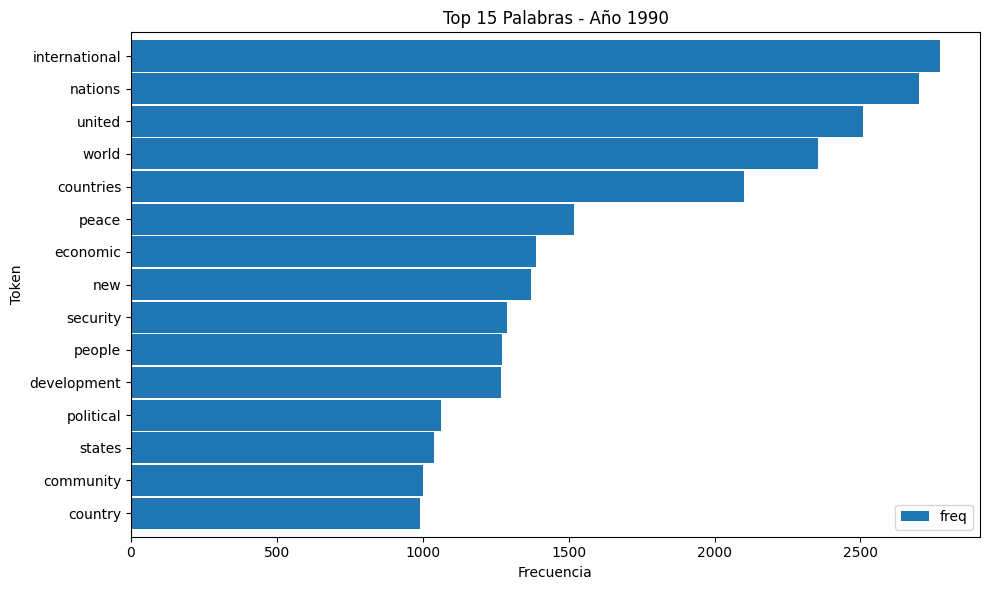

In [18]:
# 1990
fig, ax = plt.subplots(figsize=(10, 6))
freq_by_year[1990].head(15).plot(kind='barh', width=0.95, ax=ax)
ax.invert_yaxis()
ax.set(xlabel='Frecuencia', ylabel='Token', title='Top 15 Palabras - Año 1990')
plt.tight_layout()
plt.show()

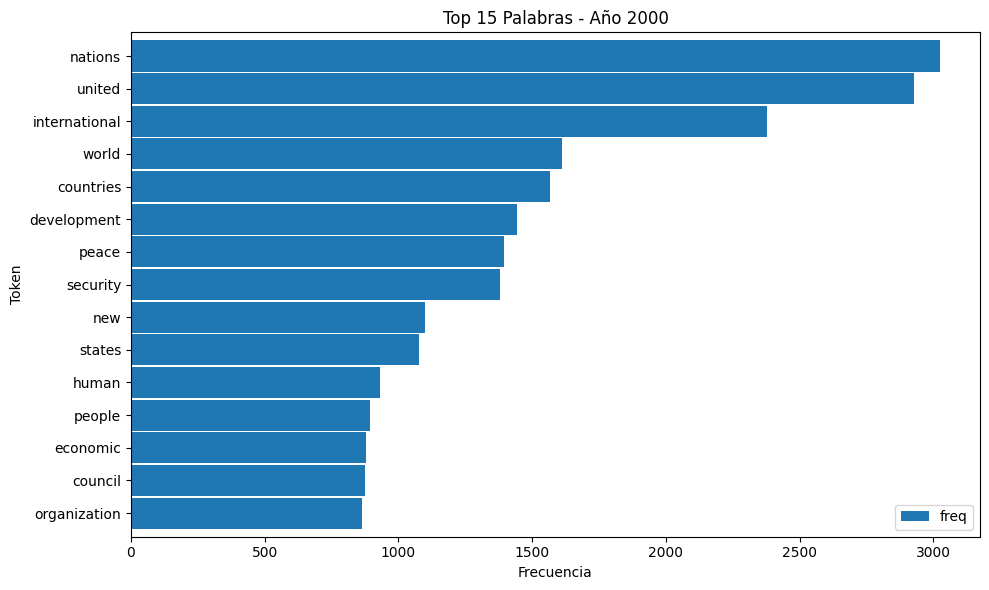

In [19]:
# 2000
fig, ax = plt.subplots(figsize=(10, 6))
freq_by_year[2000].head(15).plot(kind='barh', width=0.95, ax=ax)
ax.invert_yaxis()
ax.set(xlabel='Frecuencia', ylabel='Token', title='Top 15 Palabras - Año 2000')
plt.tight_layout()
plt.show()

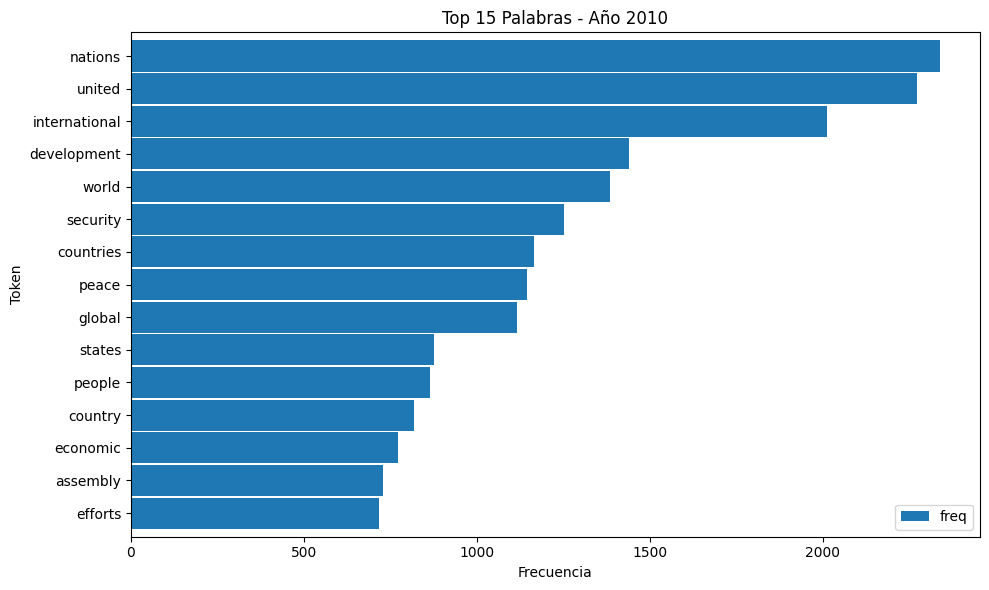

In [20]:
# 2010
fig, ax = plt.subplots(figsize=(10, 6))
freq_by_year[2010].head(15).plot(kind='barh', width=0.95, ax=ax)
ax.invert_yaxis()
ax.set(xlabel='Frecuencia', ylabel='Token', title='Top 15 Palabras - Año 2010')
plt.tight_layout()
plt.show()

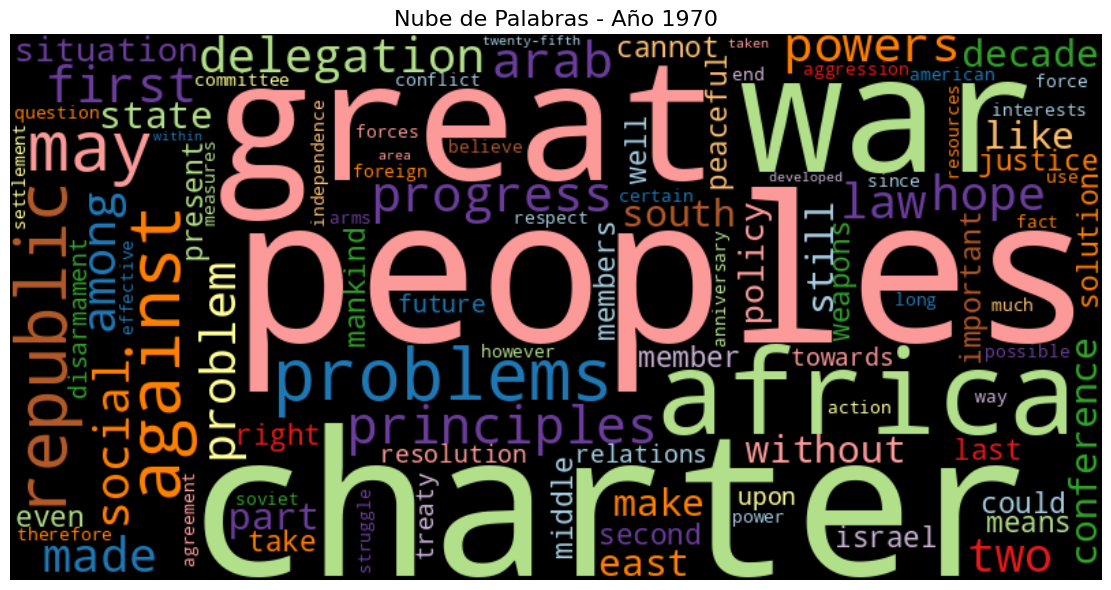

In [21]:
#Nubes de palabras (Eliminando Stopwords más frecuentes)
# 1970 - Eliminar top 50 palabras más frecuentes globales
wordcloud_plot(freq_by_year[1970]['freq'],
               title='Nube de Palabras - Año 1970',
               max_words=100,
               stopwords=freq_by_year[2010].head(50).index)

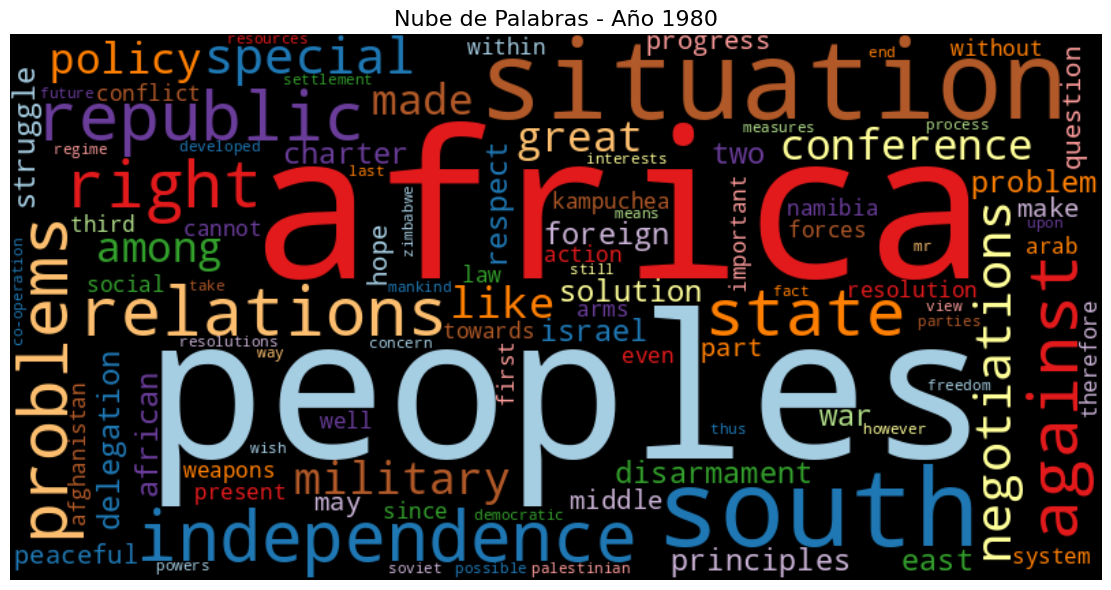

In [22]:
#Nubes de palabras (Eliminando Stopwords más frecuentes)
# 1980
wordcloud_plot(freq_by_year[1980]['freq'],
               title='Nube de Palabras - Año 1980',
               max_words=100,
               stopwords=freq_by_year[2010].head(50).index)

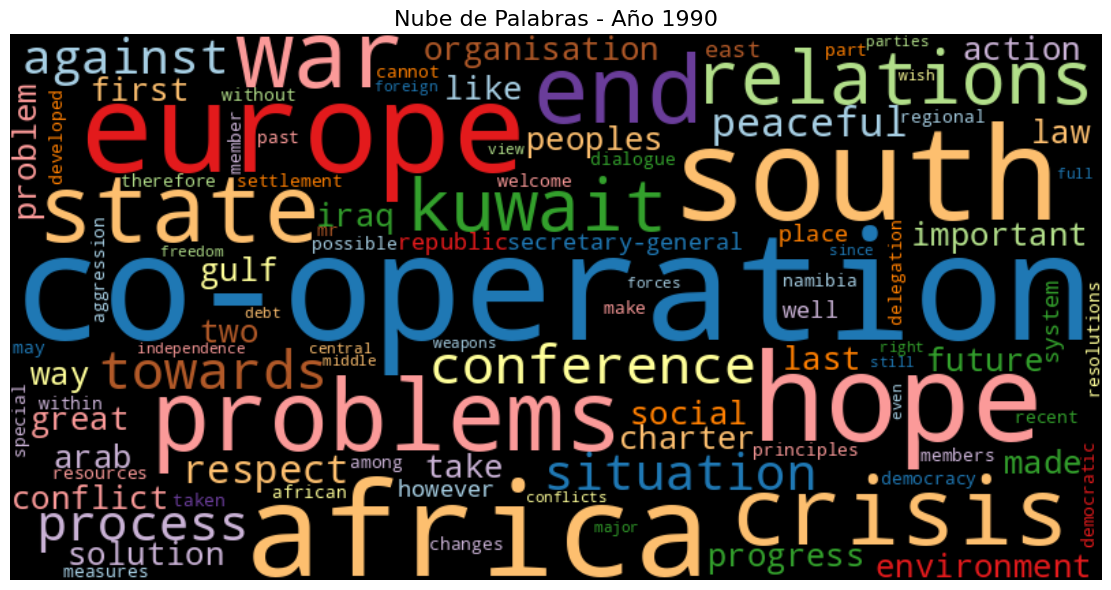

In [23]:
#Nubes de palabras (Eliminando Stopwords más frecuentes)
# 1990
wordcloud_plot(freq_by_year[1990]['freq'],
               title='Nube de Palabras - Año 1990',
               max_words=100,
               stopwords=freq_by_year[2010].head(50).index)

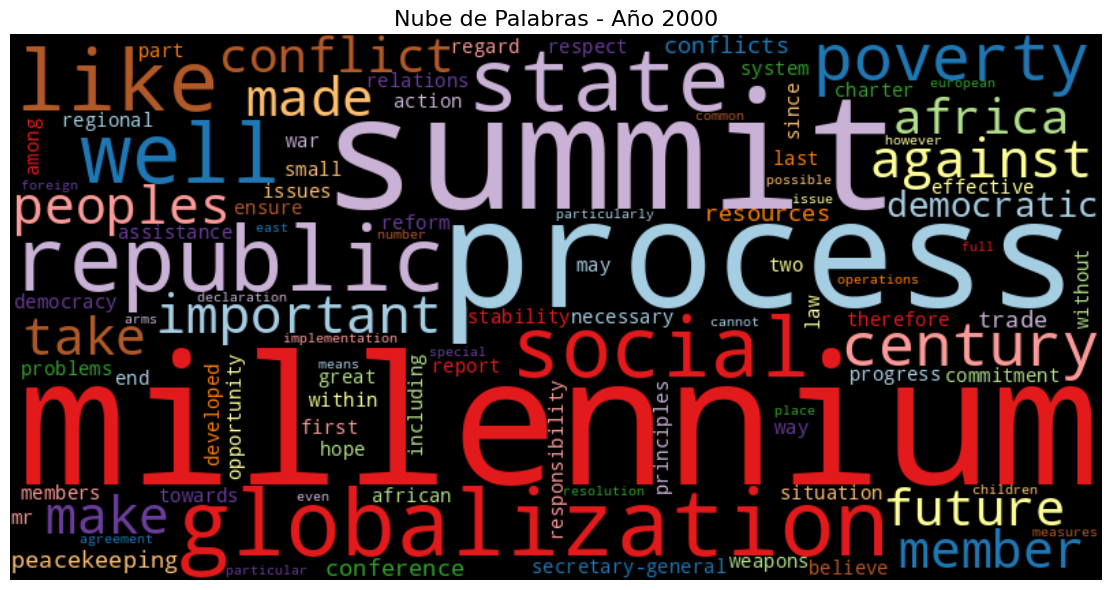

In [24]:
#Nubes de palabras (Eliminando Stopwords más frecuentes)
# 2000
wordcloud_plot(freq_by_year[2000]['freq'],
               title='Nube de Palabras - Año 2000',
               max_words=100,
               stopwords=freq_by_year[2010].head(50).index)

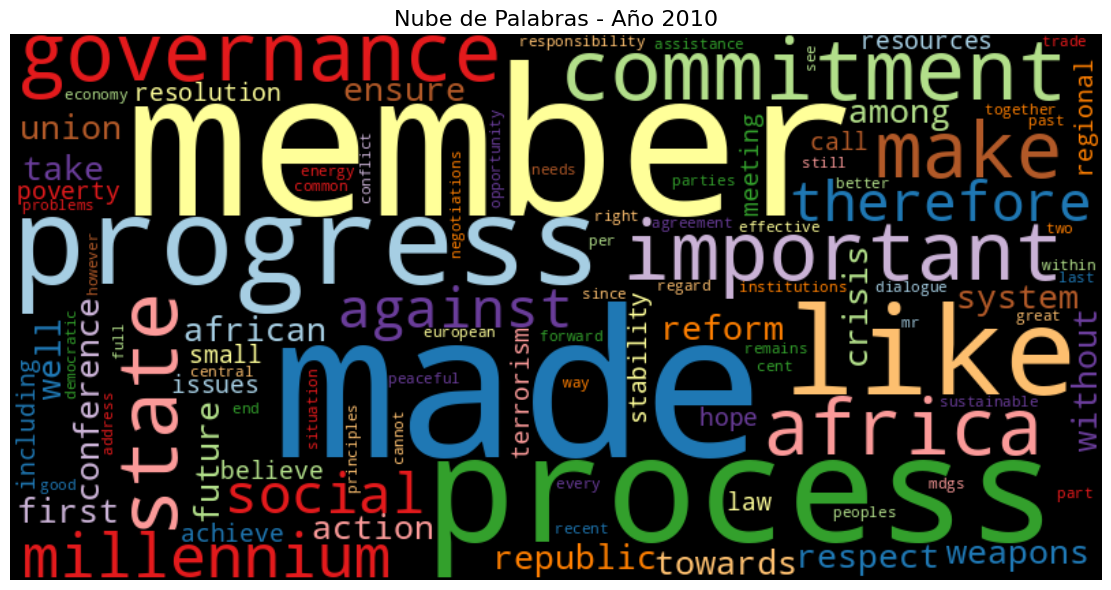

In [25]:
#Nubes de palabras (Eliminando Stopwords más frecuentes)
# 2010
wordcloud_plot(freq_by_year[2010]['freq'],
               title='Nube de Palabras - Año 2010',
               max_words=100,
               stopwords=freq_by_year[2010].head(50).index)